In [1]:
using LinearAlgebra
include("../../Tensor.jl")

updateLeft (generic function with 1 method)

## Ising Model

In [2]:
# Ising Hamiltonian- 4 Spins with Open Boundary Condition

J=1
L=4
Id = I(2);
Sz = [1 0;0 -1]/2;

# matrix form of the Ising Hamiltonian
H = J*(kron(Id,Id,Sz,Sz)+kron(Id,Sz,Sz,Id)+kron(Sz,Sz,Id,Id));
H = convert(Matrix{Float64},H)

16×16 Matrix{Float64}:
 0.75  0.0    0.0   0.0    0.0    0.0   …   0.0   0.0    0.0   0.0    0.0
 0.0   0.25   0.0   0.0    0.0    0.0       0.0   0.0    0.0   0.0    0.0
 0.0   0.0   -0.25  0.0    0.0    0.0       0.0   0.0    0.0   0.0    0.0
 0.0   0.0    0.0   0.25   0.0    0.0       0.0   0.0    0.0   0.0    0.0
 0.0   0.0    0.0   0.0   -0.25   0.0       0.0   0.0    0.0   0.0    0.0
 0.0   0.0    0.0   0.0    0.0   -0.75  …   0.0   0.0    0.0   0.0    0.0
 0.0   0.0    0.0   0.0    0.0    0.0       0.0   0.0    0.0   0.0    0.0
 0.0   0.0    0.0   0.0    0.0    0.0       0.0   0.0    0.0   0.0   -0.0
 0.0   0.0    0.0   0.0    0.0    0.0       0.0   0.0    0.0   0.0    0.0
 0.0   0.0    0.0   0.0    0.0    0.0       0.0   0.0    0.0   0.0    0.0
 0.0   0.0    0.0   0.0    0.0    0.0   …   0.0   0.0    0.0   0.0    0.0
 0.0   0.0    0.0   0.0    0.0    0.0      -0.25  0.0    0.0   0.0   -0.0
 0.0   0.0    0.0   0.0    0.0    0.0       0.0   0.25   0.0   0.0    0.0
 0.0   0.0    0

**MPO of the Ising Hamiltonian for site 'l' is given by:**

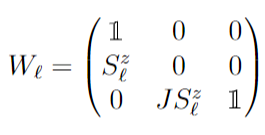


**MPO of the first site is given by the last row and last site is given by the first column.**

In [4]:
# MPO construction for 4 Spin Ising Chain

Ws = Array{Any}(undef,1,L); # defining an array to hold each MPO tensor
# first site tensor
Ws[1]=zeros(1,2,3,2);
Ws[1][1,:,2,:] = J*Sz;
Ws[1][1,:,3,:] = Id;

# MPO for site 2 to L-1
for itw in (2:L-1)
    Ws[itw] = zeros(3,2,3,2);
    Ws[itw][1,:,1,:] = Id;
    Ws[itw][2,:,1,:] = Sz;
    Ws[itw][3,:,2,:] = J*Sz;
    Ws[itw][3,:,3,:] = Id;
end

# MPO tensor for last site
Ws[end] = zeros(3,2,1,2);
Ws[end][1,:,1,:] = Id;
Ws[end][2,:,1,:] = Sz;

In [5]:
# Reconstruction of Hamiltonian from MPO

M = Ws[1]
for itw in 2:L
    M = contract(M,4,3,Ws[itw],4,1);
    M = permutedims(M,(1,2,4,5,3,6));
    if itw < L
        M = reshape(M,(1,2^itw,3,2^itw));
    end
end

recon_H = reshape(M,(2^L,2^L))

16×16 Matrix{Float64}:
 0.75  0.0    0.0   0.0    0.0    0.0   …   0.0   0.0    0.0   0.0   0.0
 0.0   0.25   0.0   0.0    0.0    0.0       0.0   0.0    0.0   0.0   0.0
 0.0   0.0   -0.25  0.0    0.0    0.0       0.0   0.0    0.0   0.0   0.0
 0.0   0.0    0.0   0.25   0.0    0.0       0.0   0.0    0.0   0.0   0.0
 0.0   0.0    0.0   0.0   -0.25   0.0       0.0   0.0    0.0   0.0   0.0
 0.0   0.0    0.0   0.0    0.0   -0.75  …   0.0   0.0    0.0   0.0   0.0
 0.0   0.0    0.0   0.0    0.0    0.0       0.0   0.0    0.0   0.0   0.0
 0.0   0.0    0.0   0.0    0.0    0.0       0.0   0.0    0.0   0.0   0.0
 0.0   0.0    0.0   0.0    0.0    0.0       0.0   0.0    0.0   0.0   0.0
 0.0   0.0    0.0   0.0    0.0    0.0       0.0   0.0    0.0   0.0   0.0
 0.0   0.0    0.0   0.0    0.0    0.0   …   0.0   0.0    0.0   0.0   0.0
 0.0   0.0    0.0   0.0    0.0    0.0      -0.25  0.0    0.0   0.0   0.0
 0.0   0.0    0.0   0.0    0.0    0.0       0.0   0.25   0.0   0.0   0.0
 0.0   0.0    0.0   0.0    0

In [6]:
isapprox(H,recon_H, atol=1e-8) # verfication

true

## Exponentially Decaying Long Range Interaction in Ising Model

In [ ]:
## Solution for exponential long-range interaction

J=1
L=6
Id = I(2);
Sz = [1 0;0 -1]/2;
lambda = 1

Ws = Array{Any}(undef,1,L)
Ws[1]=zeros(1,2,3,2)
Ws[1][1,:,2,:] = -exp(-lambda)*Sz
Ws[1][1,:,3,:] = Id;

for itw in (2:L-1)
    Ws[itw] = zeros(3,2,3,2)
    Ws[itw][1,:,1,:] = Id
    Ws[itw][2,:,1,:] = Sz
    Ws[itw][2,:,2,:] = exp(lambda)*Id
    Ws[itw][3,:,2,:] = -exp(lambda)*Sz
    Ws[itw][3,:,3,:] = Id
end

Ws[end] = zeros(3,2,1,2)
Ws[end][1,:,1,:] = Id
Ws[end][2,:,1,:] = Sz;

M = Ws[1]
for itw in 2:L
    M = contract(M,4,3,Ws[itw],4,1)
    M = permutedims(M,(1,2,4,5,3,6))
    if itw < L
        M = reshape(M,(1,2^itw,3,2^itw))
    
    end
end

H_MPO = reshape(M,(2^L,2^L))